**AVOCADOS: Will we be able to afford them in the future?**

**INTRODUCTION**

The datasets will focus on Organic and Non-Organic Avocado's. There are two datasets that I will be working with. One dataset (df) includes the following
columns: date, average price, region, total volume, 4046, 4425, 4770, and type. 

The second dataset (df2) is a copy of the first dataset. Df2 only includes region, type, year, month, 4046,
4225, and 4770. The PLU codes are monthly summation of units sold. This makes it easier for me to analyze
price activity later.




 **Please note:**  

**4046, 4770, 4425 are PLU (Product Lookup Codes), which are the stickers you
see on produce, allowing scanners to mark them in their inventory.**
** The figures under the PLU codes represent the unit sold that week.The data was 
downloaded from Hass Avocado Board website on May 2018. Total Volume represents 
the total amount of Avocado's sold. The region column 
    is just another way of saying city. The datasets type focuses on Organic and Non-Organic Avocado's**
    
    
    










The data should be able to assist in understanding:

* Are there major differnces in the Average Price of Avocado's for different cities in the U.S. ?
* Are there noticeable price differences between Organic and Non-Organic Avocado's ?
* What is the Product Lookup Codes price distribution amongst Avocado's ?



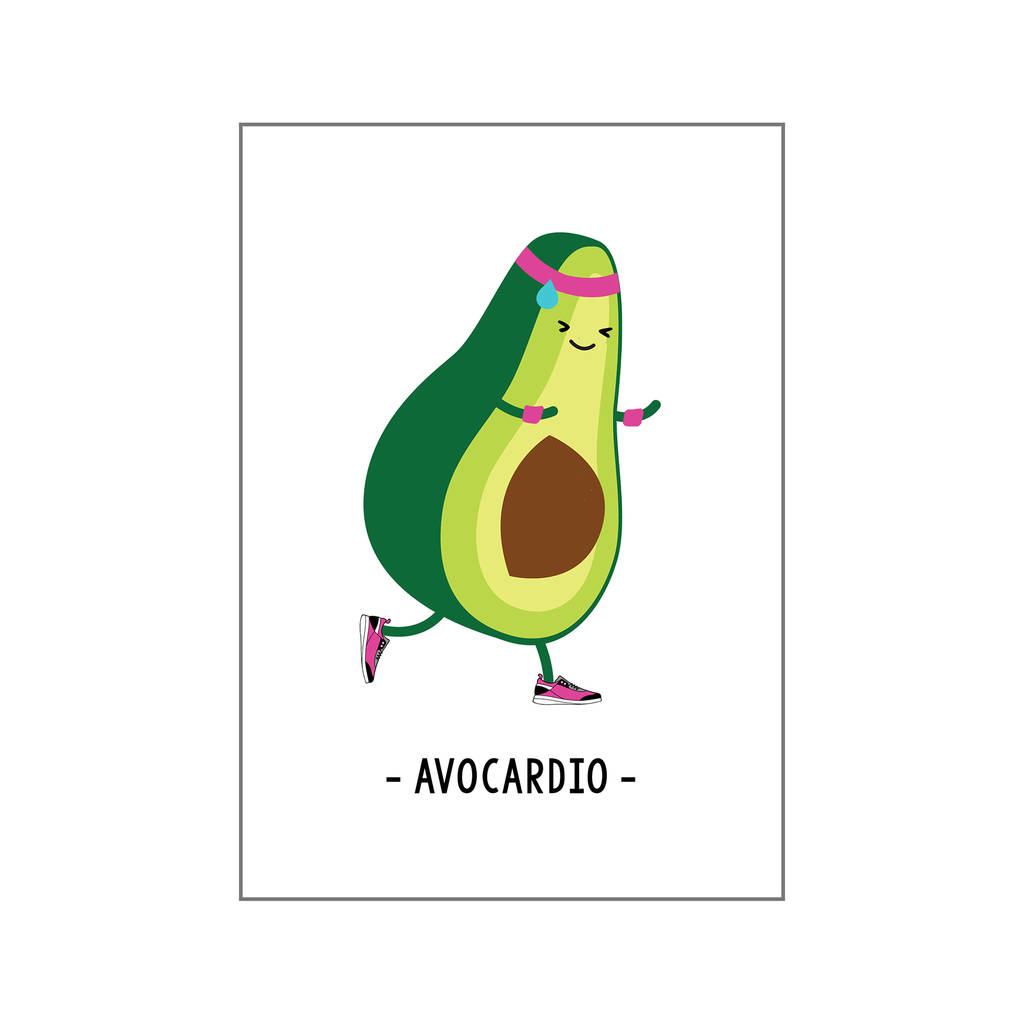

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**IMPORTING AND FORMATING THE DATASET:**

In [ ]:
# Importing the raw Avocado datasets
df = pd.read_csv('/kaggle/input/avocadoprices/avocado.csv')
df2 = pd.read_csv('/kaggle/input/avocado-plu/avocadoPLU.csv')


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from datetime import datetime
from scipy.stats import ttest_ind

In [ ]:
#This will allow us to visualize some of the raw data and delete some columns that take up too much noise....

del df['4046 pct..1']
del df['4770 pct..1']
del df['4225 pct..1']
del df['4046 pct.']
del df['4770 pct.']
del df['4225 pct.']
df.head()

In [ ]:
df2.head()

In [ ]:
print(df.shape)
print(df2.shape)

* The datasets have enough data to present noticeable trends. There are 23,529 rows and 15 columns for the first Avocado dataset. The second dataset focusing on PLU codes has 5,184 rows and 7 colums. The datasets do not have missing information. The columns and rows have usable data.

In [ ]:
#Creating a boxplot of the Average Price for Non-Organic Avocado's from 2015-2018 per City
sns.boxplot(x='region', y='AveragePrice',data=df[df.type=='Non-Organic']).set_title("Non-Organic (2015-2018) per city",fontsize=40)

plt.ylabel('Average Price', fontsize = 30)
plt.xlabel('Region', fontsize = 30)
plt.style.use('fivethirtyeight')
plt.xticks(rotation=90)



#creating a reference of the above boxplot so the size may be adjusted 
fig=plt.gcf()
fig.set_size_inches(20.7,9.27)


In [ ]:
#Creating a boxplot of the Average Price for Non-Organic Avocado's from 2015-2018 per City
sns.boxplot(x='region', y='AveragePrice',data=df[df.type=='organic']).set_title("Organic (2015-2018) per city",fontsize=40)
plt.ylabel('Average Price', fontsize=30)
plt.xlabel('Region' ,fontsize=30)
plt.style.use('fivethirtyeight')
plt.xticks(rotation=90)

#creating a reference of the above boxplot so the size may be adjusted 
fig=plt.gcf()
fig.set_size_inches(20.7,9.27)

          The boxplot is a useful diagram displaying ranges of values. The ranges 
          are split into three quartiles and the black line in the middle of the 
          box represenets the median of the values. The black dots above/below 
          will represent the outliers for the values. The solid black lines are 
          called the Whiskers and they represent the lowest/highest values. 

   The interquartile range for Non-Organic Avocado's shows that the average prices for 2015 to 2018 was around (1.25 - 1.00)
   The interquartile range for Organic Avocado's shows that the average prices for 2015 to 2018 was around (2.00 - 1.50) The box plot
    displays the Orgacic Avocado's to be the Averaging higher prices.

In [ ]:
df['year'] =pd.to_datetime(df.Date).dt.year
df['months'] = pd.to_datetime(df.Date).dt.month

In [ ]:

df.head()

In [ ]:
sns.violinplot(x='type', y='AveragePrice',data=df, fontsize = 20)

plt.ylabel('Average Price' ,fontsize=30)
plt.xlabel('Type' ,fontsize=30)
plt.yticks(np.arange(0.5, 4.0, 0.30))
fig=plt.gcf()
fig.set_size_inches(25.7,10.27)


* The average prices from 2015-2018 for Non-Organic and Organic Avocado's shows that Organic Avocado's are more expensive. The Organic Average price 
  mean is around 1.50 while Non-Organic is around 1.00

In [ ]:
plt.figure(figsize=(12,10))

df[df.year==2015].groupby('months').AveragePrice.mean().plot()
df[df.year==2016].groupby('months').AveragePrice.mean().plot()
df[df.year==2017].groupby('months').AveragePrice.mean().plot()
df[df.year==2018].groupby('months').AveragePrice.mean().plot()
plt.legend([2015, 2016, 2017, 2018])
plt.ylabel('Average Price',fontsize=30)
plt.xlabel('Month',fontsize=30)
plt.title('Mean of the average price per month (Organic & Non-Organic)',fontsize=40)

fig=plt.gcf()
fig.set_size_inches(30.7,15.27)
plt.show()


In [ ]:
plt.style.use('fivethirtyeight')
df[(df.year==2015) & (df.type=='Non-Organic' ) ].groupby('months').AveragePrice.mean().plot()
df[(df.year==2016) & (df.type=='Non-Organic' ) ].groupby('months').AveragePrice.mean().plot()
df[(df.year==2017) & (df.type=='Non-Organic' ) ].groupby('months').AveragePrice.mean().plot()
df[(df.year==2018) & (df.type=='Non-Organic' ) ].groupby('months').AveragePrice.mean().plot()

plt.legend([2015, 2016, 2017, 2018])

plt.xticks(np.arange(2, 13, 2))
plt.yticks(np.arange(0.8, 2.0, 0.15))
plt.ylabel('Average Price',fontsize=30)
plt.xlabel('Month',fontsize=30)
plt.title('Mean of the average price for Non-Organic per month',fontsize=40)

fig=plt.gcf()
fig.set_size_inches(30.7,15.27)
plt.show()

In [ ]:
plt.style.use('fivethirtyeight')
df[(df.year==2015) & (df.type=='organic' ) ].groupby('months').AveragePrice.mean().plot()
df[(df.year==2016) & (df.type=='organic' )].groupby('months').AveragePrice.mean().plot()
df[(df.year==2017) & (df.type=='organic' ) ].groupby('months').AveragePrice.mean().plot()
df[(df.year==2018) & (df.type=='organic' ) ].groupby('months').AveragePrice.mean().plot()
plt.legend([2015, 2016, 2017, 2018])

plt.yticks(np.arange(1.2, 2.8, 0.10))
plt.ylabel('Average Price',fontsize=30)
plt.xlabel('Month',fontsize=30)
plt.title('Mean of the average price for Organic per month',fontsize=40)

fig=plt.gcf()
fig.set_size_inches(30.7,15.27)
plt.show()

It is clear to see that for the year 2017 there was significant uptrend in price during the month from August to early October. It is also important to  notice that in years 2015, 2016, and 2017 the Average prices saw a decline towards the end of the year. The average prices for 2018 saw a slight increase in prices.

In [ ]:
plt.hist(df[df.type=='Non-Organic'].AveragePrice ,label='Non-Organic', alpha = 0.25)
plt.hist(df[df.type=='organic'].AveragePrice,label='Organic', alpha = 0.4)

plt.ylabel('Frequency', fontsize= 25)
plt.xlabel('Average Price', fontsize=20)
plt.legend(loc='upper right')

fig=plt.gcf()
fig.set_size_inches(30.7,15.27)
plt.show()

** Independent Sample T-Test: **

*We have noticed that from the months from August to October, Organic and Non-Organic prices in 2017 have increased considerably amongst
all other years. A T-test will be run on Non-Organic and Organic prices for the months of Aug 2017, September 2017 and October 2017. The 
T-test will investigate if there is any significance amongst the the two types of Avocado's during this time period*


In [ ]:

Organic_sample     = df[(df.year==2017) & (df.type =='organic') & (df['months'] >= 8) & (df['months'] <=10)].AveragePrice.sample(n=50) 
Non_Organic_sample = df[(df.year==2017) & (df.type =='Non-Organic') & (df['months'] >= 8) & (df['months'] <=10)].AveragePrice.sample(n=50)

ttest_ind(Organic_sample, Non_Organic_sample)

 A large t-score indicates that the groups are different. A small t-score indicates that the groups are similar. 
 The low t-score would mean that there is similarity between the groups. This would make sense since the groups 
 are both Avocado's sold together in the same basket. 

The p-value is the probability that the results from the sample data occurred by chance. The p-value indicates that there is a .001% probability  that this occurred by chance. This would mean that this event is pretty significant and is valid data.     *

In [ ]:
Organic2017_sample     = df[(df.year==2017) & (df.type =='organic')].AveragePrice.sample(n=50)
Non_Organic2017_sample  = df[(df.year==2017) & (df.type =='Non-Organic')].AveragePrice.sample(n=50)
ttest_ind(Organic2017_sample,Non_Organic2017_sample )

A small t-score indicates that the groups are similar. The low t-score would mean that there is similarity between the groups. The p-value indicates that there is a 0.001% probability  that this occurred by chance. This would mean that this event is pretty significant and is valid data.

In [ ]:
df2.head()

In [ ]:
def monthmap(m):  
    if m=='Jan':  
        return 1
    if m=='Feb':  
        return 2
    if m=='Mar':  
        return 3
    if m=='Apr':  
        return 4
    if m=='May':  
        return 5
    if m=='Jun':  
        return 6
    if m=='Jul':  
        return 7
    if m=='Aug':  
        return 8
    if m=='Sep':  
        return 9
    if m=='Oct':  
        return 10
    if m=='Nov':  
        return 11
    if m=='Dec':  
        return 12

In [ ]:

df2['month2'] = df2.month.apply(lambda x: monthmap(x)) 

In [ ]:
df2.head()

In [ ]:
df2[df2.year==2017].groupby('month2')['4046'].mean().plot() 
df2[df2.year==2017].groupby('month2')['4225'].mean().plot() 
df2[df2.year==2017].groupby('month2')['4770'].mean().plot() 

plt.title('2017: Average volume per month for each PLU code',fontsize=40)
plt.xlabel('Month',fontsize=30)
plt.ylabel('Volume',fontsize=30)
plt.yticks(np.arange(0,2000000, 100000))
plt.legend([4046, 4225, 4770])

fig=plt.gcf()
fig.set_size_inches(30.7,15.27)
plt.show()


In [ ]:
s = pd.Series(df['region'])
print(s.nunique())
print(s.unique())

**Conclusions**

> The datasets are able to give us insights with price distribution amongst the different PLU codes. We are able to see different pricing patterns
  for Non-Organic and Organic Avocado's. Organic Avocado's are priced higher than Non-Avocado's. The next phase, if I had better data, would be to look at   the temperatures and conduct a cross analysis. This analysis would look at different temperatures in the regions and observe any relationships.

![](https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwig6538nuvlAhVNITQIHV5zA8EQjRx6BAgBEAQ&url=https%3A%2F%2Fwww.teepublic.com%2Ftank-top%2F2688450-funny-avocado-vegan-couple-joke-guacamole-good-fat&psig=AOvVaw1RVi5i6OChlyG8Z5XXo4bY&ust=1573873793097470)